In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, misc
from scipy.fft import fft, fftfreq, fftshift

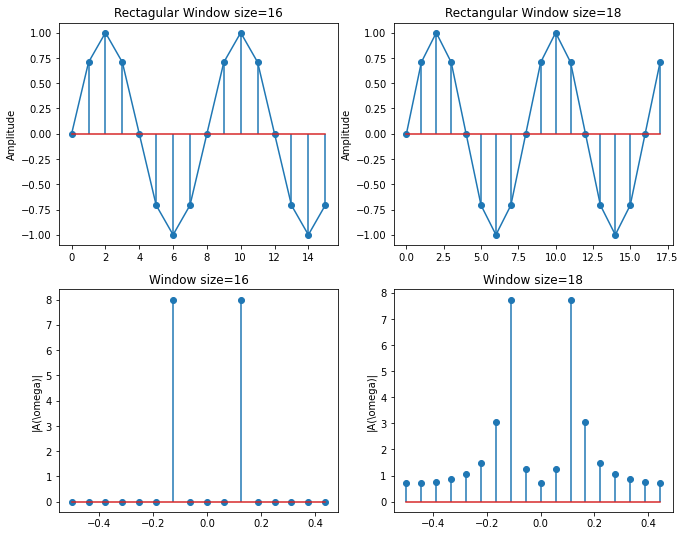

In [2]:
F = 1 #Hz
N=8
cycles=4
L1=16
L2=18
window_1=np.ones((1,L1))
window_2=np.ones((1,L2))

time = np.arange(0, cycles*N,1)
amp=np.sin((2*np.pi*F)*time/N)

fft_1 = fft(amp[0:L1]) # magnitud
fft_2 = fft(amp[0:L2])
xf_1 = fftfreq(amp[0:L1].shape[0], 1 / F)
xf_2 = fftfreq(amp[0:L2].shape[0], 1 / F) # resp en frecuencia

plt.figure(figsize=[11, 9])

plt.subplot(2, 2, 1)
plt.plot(time[0:L1], amp[0:L1])
plt.stem(time[0:L1], amp[0:L1])
plt.title('Rectagular Window size=16')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(time[0:L2], amp[0:L2])
plt.stem(time[0:L2], amp[0:L2])
plt.title('Rectangular Window size=18')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.stem(xf_1,np.abs(fft_1))
plt.title('Window size=16')
plt.ylabel('|A(\omega)|')

plt.subplot(2, 2, 4)
plt.stem(xf_2,np.abs(fft_2))
plt.title('Window size=18')
plt.ylabel('|A(\omega)|')

plt.show()


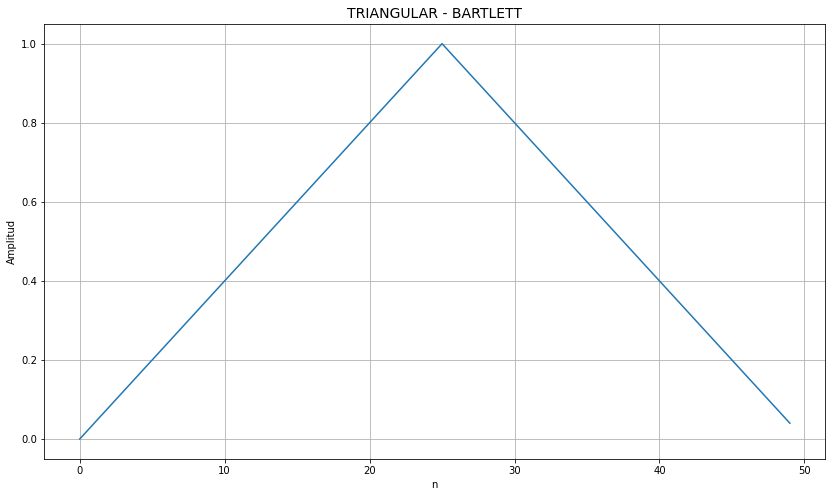

In [3]:
# Ventana Triangular - Bartlett

N = 50 #longitud
Ventana_Triangular  = signal.get_window('bartlett', N)
n = np.arange(0,N,1)

plt.figure(figsize = (14,8))
plt.plot(n, Ventana_Triangular)
plt.xlabel('n') #muestras
plt.ylabel('Amplitud') 
plt.title('TRIANGULAR - BARTLETT', fontsize = 14)
plt.grid()
plt.show()

In [4]:
#Respuesta en frecuencia Triangular - Barlett

triangular_fft = np.fft.rfft(Ventana_Triangular)
freqsTriangular = np.fft.rfftfreq( len(Ventana_Triangular), d=1/100 )


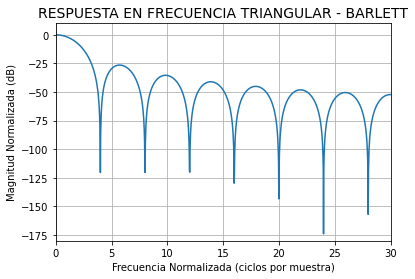

In [5]:
#Haciendo Zero Padding para interpolar la señal
nTriangular = 4096 #11 bits
triangular_fft = np.fft.rfft(Ventana_Triangular, nTriangular)
freqsTriangular = np.fft.rfftfreq( nTriangular, d=1/100 )

#print("Tam Freqs Triangular:", len(freqsTriangular))

plt.plot(freqsTriangular, 20*np.log10(abs(triangular_fft)/np.abs(triangular_fft).max() ) )
plt.xlim(0,30)
plt.ylim(-180,10)
plt.xlabel('Frecuencia Normalizada (ciclos por muestra)') #muestras
plt.ylabel('Magnitud Normalizada (dB)')
plt.title('RESPUESTA EN FRECUENCIA TRIANGULAR - BARLETT', fontsize = 14)
plt.grid()
plt.show()

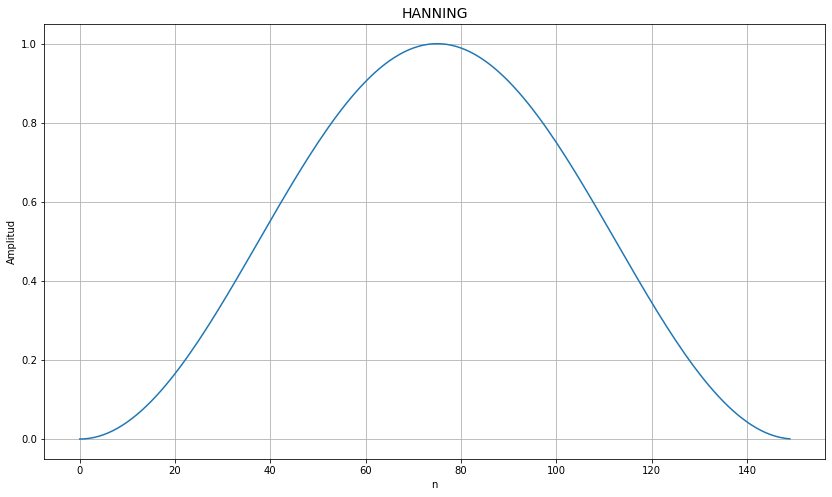

In [7]:
# Ventana Hanning

N = 150 #longitud
Ventana_Hanning  = signal.get_window('hanning', N)
n = np.arange(0,N,1)

plt.figure(figsize = (14,8))
plt.plot(n, Ventana_Hanning)
plt.xlabel('n') #muestras
plt.ylabel('Amplitud') 
plt.title('HANNING', fontsize = 14)
plt.grid()
plt.show()

In [8]:
#Respuesta en frecuencia Hanning

hanning_fft = np.fft.rfft(Ventana_Hanning)
freqsHanning = np.fft.rfftfreq( len(Ventana_Hanning), d=1/100 )
#plt.plot(freqsHamming, np.abs(hamming_fft) )


C:\Users\Juan Jose Restrepo\AppData\Local\Temp\ipykernel_30512\3798179447.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqsHanning, 20*np.log10(abs(hanning_fft)/np.abs(hanning_fft).max() ) )


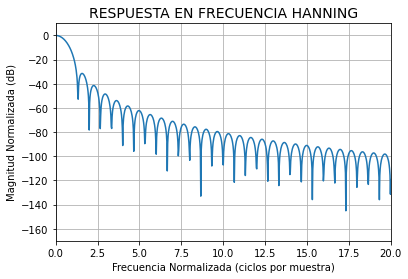

In [9]:
#Haciendo Zero Padding para interpolar la señal
nHanning = 4096 #11 bits
hanning_fft = np.fft.rfft(Ventana_Hanning, nHanning)
freqsHanning = np.fft.rfftfreq( nHanning, d=1/100 )


plt.plot(freqsHanning, 20*np.log10(abs(hanning_fft)/np.abs(hanning_fft).max() ) )
plt.xlim(0,20)
plt.ylim(-170,10)
plt.xlabel('Frecuencia Normalizada (ciclos por muestra)') #muestras
plt.ylabel('Magnitud Normalizada (dB)')
plt.title('RESPUESTA EN FRECUENCIA HANNING', fontsize = 14)
plt.grid()
plt.show()


In [10]:
#Respuesta en frecuencia Hanning

A = fft(Ventana_Hanning, 1024)/ (len(Ventana_Hanning)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
DB_HANNING = 20*np.log10( np.abs( fftshift( A / abs(A).max() ) ) )

'''
plt.figure(figsize = (14,8))
plt.plot(freq, DB_HANNING)
plt.axis([-0.5, 0.5, -120, 0])
plt.xlabel('Frecuencia Normalizada (ciclos por muestra)') #muestras
plt.ylabel('Magnitud Normalizada (DB)')
plt.title('RESPUESTA EN FRECUENCIA HANNING', fontsize = 14)
plt.grid()
plt.show()
'''

C:\Users\Juan Jose Restrepo\AppData\Local\Temp\ipykernel_30512\2568273478.py:5: RuntimeWarning: divide by zero encountered in log10
  DB_HANNING = 20*np.log10( np.abs( fftshift( A / abs(A).max() ) ) )


"\nplt.figure(figsize = (14,8))\nplt.plot(freq, DB_HANNING)\nplt.axis([-0.5, 0.5, -120, 0])\nplt.xlabel('Frecuencia Normalizada (ciclos por muestra)') #muestras\nplt.ylabel('Magnitud Normalizada (DB)')\nplt.title('RESPUESTA EN FRECUENCIA HANNING', fontsize = 14)\nplt.grid()\nplt.show()\n"

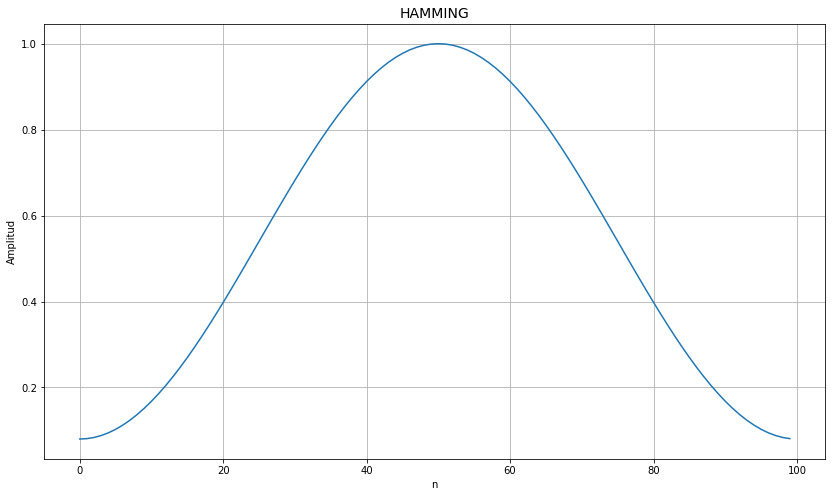

In [11]:
# Ventana Hamming

N = 100 #longitud
Ventana_Hamming  = signal.get_window('hamming', N)
n = np.arange(0,N,1)

plt.figure(figsize = (14,8))
plt.plot(n, Ventana_Hamming)
plt.xlabel('n') #muestras
plt.ylabel('Amplitud') 
plt.title('HAMMING', fontsize = 14)
plt.grid()
plt.show()

In [12]:
#Respuesta en frecuencia Hamming

hamming_fft = np.fft.rfft(Ventana_Hamming)
freqsHamming = np.fft.rfftfreq( len(Ventana_Hamming), d=1/100 )
#plt.plot(freqsHamming, np.abs(hamming_fft) )


C:\Users\Juan Jose Restrepo\AppData\Local\Temp\ipykernel_30512\2815120703.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqsHamming, 20*np.log10(abs(hamming_fft)/np.abs(hamming_fft).max() ) )


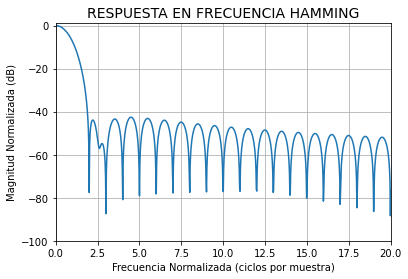

In [13]:
#Haciendo Zero Padding para interpolar la señal
nHamming = 4096 #11 bits
hamming_fft = np.fft.rfft(Ventana_Hamming, nHamming)
freqsHamming = np.fft.rfftfreq( nHamming, d=1/100 )

plt.plot(freqsHamming, 20*np.log10(abs(hamming_fft)/np.abs(hamming_fft).max() ) )
plt.xlim(0,20)
plt.ylim(-100,1)
plt.xlabel('Frecuencia Normalizada (ciclos por muestra)') #muestras
plt.ylabel('Magnitud Normalizada (dB)')
plt.title('RESPUESTA EN FRECUENCIA HAMMING', fontsize = 14)
plt.grid()
plt.show()


In [14]:
#Respuesta en frecuencia Hamming

A = fft(Ventana_Hamming, 256)/ (len(Ventana_Hamming)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
DB_HAMMING = 20*np.log10( np.abs( fftshift( A / abs(A).max() ) ) )
'''
plt.figure(figsize = (14,8))
plt.plot(freq, DB_HAMMING)
plt.axis([-0.5, 0.5, -120, 0])
plt.xlabel('Frecuencia Normalizada (ciclos por muestra)') #muestras
plt.ylabel('Magnitud Normalizada (dB)')
plt.title('RESPUESTA EN FRECUENCIA HAMMING', fontsize = 14)
plt.grid()
plt.show()
'''

C:\Users\Juan Jose Restrepo\AppData\Local\Temp\ipykernel_30512\1264657300.py:5: RuntimeWarning: divide by zero encountered in log10
  DB_HAMMING = 20*np.log10( np.abs( fftshift( A / abs(A).max() ) ) )


"\nplt.figure(figsize = (14,8))\nplt.plot(freq, DB_HAMMING)\nplt.axis([-0.5, 0.5, -120, 0])\nplt.xlabel('Frecuencia Normalizada (ciclos por muestra)') #muestras\nplt.ylabel('Magnitud Normalizada (dB)')\nplt.title('RESPUESTA EN FRECUENCIA HAMMING', fontsize = 14)\nplt.grid()\nplt.show()\n"

In [15]:
# Parametros Entrada: 
# x(La señal), N(Numero de puntos que tendra la transformada)
def TDF_directa(x,N):
    
    IM = [];
    RE = [];
    Mag = [];
    Fase = [];
    sumador_IM = 0;
    sumador_RE = 0;
    
    for k in range(N):
        
        for n in range(N):
            # sumatoria de de las partes reales y complejas a lo largo de los ciclos
            sumador_IM = (sumador_IM) + (x[n]*np.sin(2*np.pi*k*(n/N)));
            sumador_RE = (sumador_RE) + (x[n]*np.cos(2*np.pi*k*(n/N)));
            
        IM.append(sumador_IM);
        RE.append(sumador_RE);
        #Magnitud
        IM_2 = (sumador_IM)**2
        RE_2 = (sumador_RE)**2
        MAG = np.sqrt((IM_2)+(RE_2))
        Mag.append(MAG)
        #Fase
        FASE = np.arctan((sumador_IM)/(sumador_RE))
        Fase.append(FASE)
        
        sumador_IM = 0;
        sumador_RE = 0;
    
    return IM, RE, Mag, Fase

#IM(Parte compleja) RE(parte real) Mag(Magnitud) Fase(Fase)

#Acondicionamos la señal para manipularla computacional
def change(TF):
    L = (len(TF)//2) #saca la parte entera
    L1 = TF[:L]
    L2 = TF[L:]
    L_TF = L2 + L1
    return L_TF


In [16]:
#Parametros:
f1 = 1/8 
T1 = 1/f1
f_sample= 8000
t_s = 1/f_sample

t = np.arange(0, 0.01, 2*t_s)  #original
N = len(t)
A = 2

#Señal
x = A*np.sin(2000*np.pi*f1*t)

#Transformada
TDF = TDF_directa(x,N)
#Componente Imaginario
Com_Imag = TDF[0]
#Componente Real
Com_Real = TDF[1]
#Magnitud
Mag = TDF[2]
Mag = change(Mag)
#Fase
Fase = TDF[3]

#Para pasar del dominio de muestras (tiempo) a dominio de frecuencia
f = np.arange(-N/2,N/2,1)*(f_sample/N)


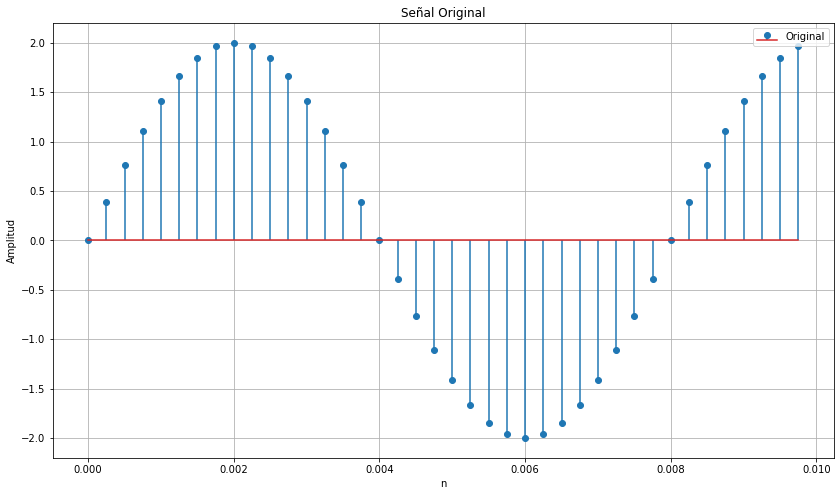

Tamanio Seno:  40
Tamanio Triangular:  40


In [17]:
#GRAFICOS

#original
plt.figure(figsize = (14,8))
plt.stem(t,x, label = "Original" )
plt.grid()
plt.title('Señal Original')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.show()
print('Tamanio Seno: ', len(x))
print('Tamanio Triangular: ', len(x))

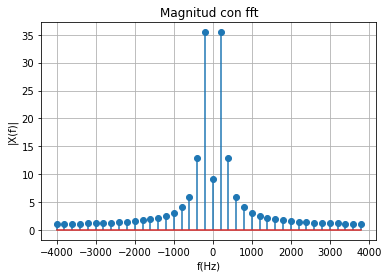

In [18]:
#Aplicando FFT Manual

N_SIGNAL = len(x)
X = fft(x)
frec = fftfreq(N_SIGNAL)*f_sample
plt.stem(frec, np.abs(X))
plt.grid()
plt.title('Magnitud con fft')
plt.xlabel('f(Hz)')
plt.ylabel('|X(f)|')
plt.show()

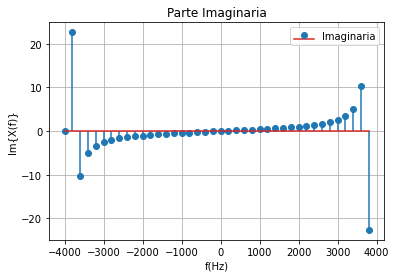

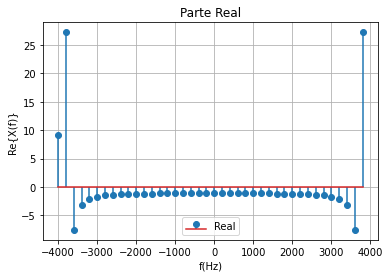

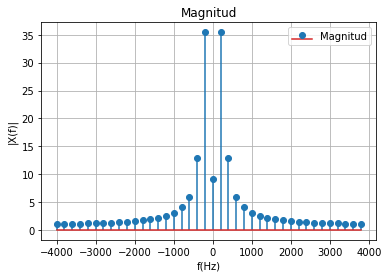

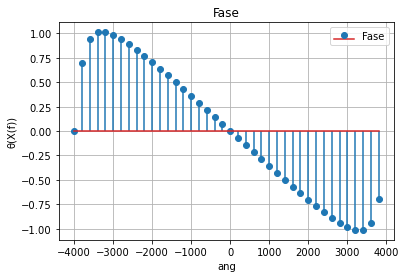

In [19]:

#parte imaginaria
plt.figure()
plt.stem(f,Com_Imag, label = "Imaginaria")
plt.grid()
plt.title('Parte Imaginaria')
plt.xlabel('f(Hz)')
plt.ylabel('Im{X(f)}')
plt.legend()

#parte real
plt.figure()
plt.stem(f,Com_Real, label = "Real")
plt.grid()
plt.title('Parte Real')
plt.xlabel('f(Hz)')
plt.ylabel('Re{X(f)}')
plt.legend()

#magnitud
plt.figure()
plt.stem(f,Mag, label = "Magnitud")
plt.grid()
plt.title('Magnitud')
plt.xlabel('f(Hz)')
plt.ylabel('|X(f)|')
plt.legend()

#fase
plt.figure()
plt.stem(f,Fase, label = "Fase")
plt.grid()
plt.title('Fase')
plt.xlabel('ang')
plt.ylabel('θ(X(f))')
### buscar como limitar el eje X
plt.legend()




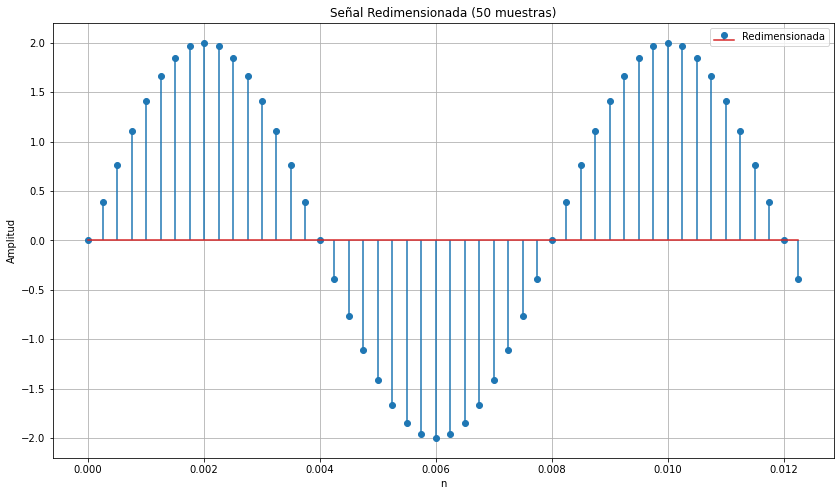

Tamaño Ventana Triangular:  50

Tamaño Seno:  50



In [20]:
# ============ Truncamiento con Venta Triangular - Barlett ============ 

#Variamos el los ciclos para obtener una longitud de señal igual a la de la ventana (N = 50)
t = np.arange(0, 1/80, 2*t_s) #1/80 para un len N = 50 tamaño Barlett - Triangular
#m = t.size

#Señal
x50 = A*np.sin(2000*np.pi*f1*t)
plt.figure(figsize = (14,8))
plt.stem(t,x50, label = "Redimensionada" )
plt.grid()
plt.title('Señal Redimensionada (50 muestras)')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.show()


#print("Triangular: ", Ventana_Triangular)
print("Tamaño Ventana Triangular: ", len(Ventana_Triangular))
print()
#print("Seno: ", x)
print("Tamaño Seno: ", len(x50))
print()
#print("Tamanio M: ", m)

Text(0.5, 0, 'f (Hz)')

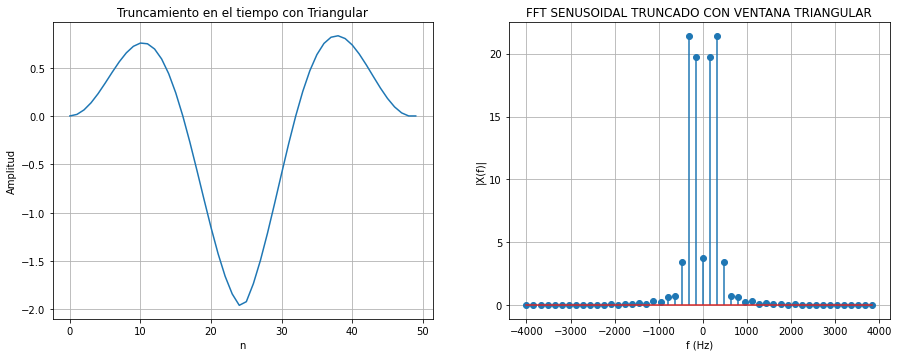

In [21]:
# TRIANGULAR
M1 = 50
n1 = np.arange(0, M1, 1)
TRIANGULAR = 1-(abs(2*n1-M1+1)/(M1-1))

TriangularTruncado = TRIANGULAR*x50
plt.figure(figsize=[15, 12])
plt.subplot(2,2,1)
plt.plot(n1,TriangularTruncado)
plt.title("Truncamiento en el tiempo con Triangular")
plt.grid()
plt.ylabel('Amplitud')
plt.xlabel('n')

# RESPUESTA EN FRECUENCIA
FFT_TRIANGULAR = fft(TriangularTruncado)
FREQ_TRIANG = fftfreq(TriangularTruncado.shape[0], 1/f_sample)

plt.subplot(2,2,2)
plt.stem(FREQ_TRIANG, np.sqrt( (FFT_TRIANGULAR.real)**2 + (FFT_TRIANGULAR.imag)**2 ) )
plt.grid()
plt.title('FFT SENUSOIDAL TRUNCADO CON VENTANA TRIANGULAR')
plt.ylabel('|X(f)|')
plt.xlabel('f (Hz)')


SENO100:  100


Text(0.5, 0, 'f (Hz)')

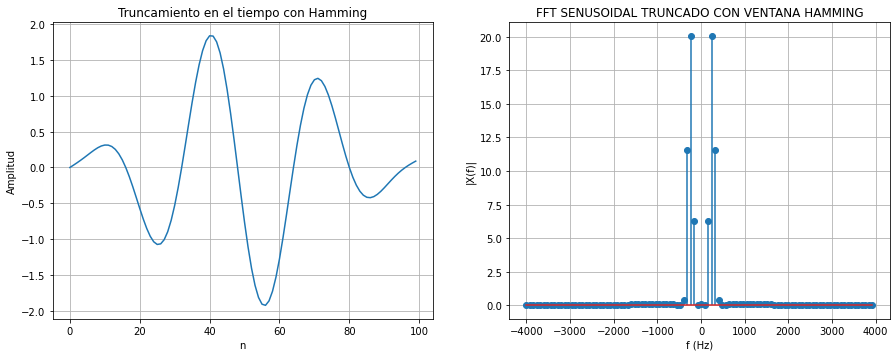

In [22]:
# HAMMING
M2 = 100
n2 = np.arange(0, M2, 1)
HAMMING = 0.54 - 0.46*np.cos(2*np.pi*n2/(M2-1))

#Señal
t = np.arange(0, 1/40, 2*t_s)
x100 = A*np.sin(2000*np.pi*f1*t)
print("SENO100: ", len(x100))
HammingTruncado = HAMMING*x100

plt.figure(figsize=[15, 12])
plt.subplot(2, 2, 1)
plt.plot(n2,HammingTruncado)
plt.title("Truncamiento en el tiempo con Hamming")
plt.grid()
plt.ylabel('Amplitud')
plt.xlabel('n')


# RESPUESTA EN FRECUENCIA
FFT_HAMMING = fft(HammingTruncado)
FREQ_HAMMING = fftfreq(HammingTruncado.shape[0], 1/f_sample)

plt.subplot(2,2,2)
plt.stem(FREQ_HAMMING, np.sqrt( (FFT_HAMMING.real)**2 + (FREQ_HAMMING.imag)**2 ) )
plt.grid()
plt.title('FFT SENUSOIDAL TRUNCADO CON VENTANA HAMMING')
plt.ylabel('|X(f)|')
plt.xlabel('f (Hz)')


Text(0.5, 0, 'f (Hz)')

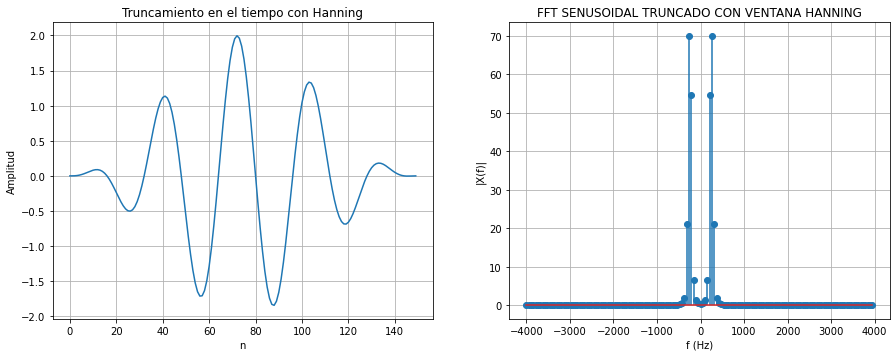

In [23]:
M3 = 150
n3 = np.arange(0, M3, 1)
HANNING = 0.5 - 0.5*np.cos(2*np.pi*n3/(M3-1)) # Ventana de Hanning

#Señal
t = np.arange(0, 1/26.7, 2*t_s)
x150 = A*np.sin(2000*np.pi*f1*t)

HanningTruncado = HANNING*x150

plt.figure(figsize=[15, 12])
plt.subplot(2, 2, 1)
plt.plot(n3, HanningTruncado)
plt.title("Truncamiento en el tiempo con Hanning")
plt.grid()
plt.ylabel('Amplitud')
plt.xlabel('n')


# RESPUESTA EN FRECUENCIA
FFT_HANNING = fft(HanningTruncado)
FREQ_HANNING = fftfreq(HanningTruncado.shape[0], 1/f_sample)

plt.subplot(2,2,2)
plt.stem(FREQ_HANNING, np.sqrt( (FFT_HANNING.real)**2 + (FFT_HANNING.imag)**2 ) )
plt.grid()
plt.title('FFT SENUSOIDAL TRUNCADO CON VENTANA HANNING')
plt.ylabel('|X(f)|')
plt.xlabel('f (Hz)')


In [ ]:
# PUNTO 3 PROCESAMIENTO SEÑAL DE AUDIO

import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from matplotlib import image
import pandas as pd
import scipy as sp
import scipy.io
import math
import cv2
import random
from PIL import Image
import time
import statsmodels.api as sm

In [ ]:
# SE OBTIENE EL ESPECTOGRAMA USANDO LIBROSA Y SE GUARDA

y, sr = librosa.load('ElCoronel.wav', sr=16000)
print("Current audio sampling rate: ", sr)

print("Audio Duration:", librosa.get_duration(y=y, sr=sr))

D = librosa.stft(y, hop_length=64, win_length=256)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)


librosa.display.waveshow(y, sr=sr)
plt.savefig('plot1.png')
plt.show()
fig2, ax2 = plt.subplots()

spec = librosa.display.specshow(S_db, sr=sr,hop_length=64, x_axis='s', y_axis='linear')
plt.savefig('plot2.png')

ax2.set(title='Espectograma audio')
plt.colorbar(spec, ax=ax2, format="%+2.f dB")

plt.show()

In [ ]:
#SE CORTA LA IMAGEN DEL ESPECTOGRAMA Y SE TRANSFORMA A ESCALA DE GRISES 
#Y UN ÚNICO CANAL. ADEMÁS SE OBTIENE EL PEDAZO CORRESPONDIENTE AL FONEMA


#288 x 432
im1 = Image.open('plot2.png')
im2 = Image.open('plot2.png')
#ESPECTOGRAMA AUDIO
im_crop = im1.crop((55, 35, 390, 253))
im_crop.save('plot31.png', quality=95)

im_crop=im_crop.convert('L')

im_crop.save('plot3.png', quality=95)
#ESPECTOGRAMA FONEMA
#SON 335 CUADROS DEL ESPECTOGRAMA ENTERO
#SON 9,76 SEGUNDOS
#DE 1,6 s A 2,5 se dice coronel aproximadamente
#LA MAYOR POTENCIA DE LA FRECUENCIA SE VE ENTRE 0 Y 3000, ES HASTA 8000 Hz
#SON 218 CUADROS DE ALTO DEL ESPECTROGRAMA
#SE RECORTA ENTONCES EN HORIZONTAL DEL CUADRO 58 AL CUADRO 86
#SE RECORTA ENTONCES EN HORIZONTAL DEL CUADRO 136 AL CUADRO 218
#AJUSTADO SE SUMA 55 EN HORIZONTAL Y 35 EN VERTICAL
#103 a 141.    171 a 253
im_crop = im2.crop((100, 203, 150, 253))
im_crop.save('plot41.png', quality=95)
im_crop = im_crop.convert("L")
im_crop.save('plot4.png', quality=95)

In [ ]:
#SE CARGAN LAS IMAGENES A USAR PARA CORRELACIONAR 
#Y SE OBTIENEN SUS TAMAÑOS Y CARACTERISTICAS

print("CARACTERISTICAS IMAGEN SPECTOGRAMA ORIGINAL")

original= image.imread('plot2.png')
print(original.dtype)
print(original.shape)

print("CARACTERISTICAS IMAGEN SPECTOGRAMA AUDIO GRISES")

spec_audio = image.imread('plot3.png')
spec_audio1 = image.imread('plot31.png')

print(spec_audio.dtype)
print(spec_audio.shape)
plt.imshow(spec_audio)
plt.show()

print("CARACTERISTICAS IMAGEN SPECTOGRAMA FONEMA GRISES")

spec_fonema = image.imread('plot4.png')
spec_fonema1 = image.imread('plot41.png')
print(spec_fonema.dtype)
print(spec_fonema.shape)

In [ ]:
# FUNCION DE CORRELACION

def conv3d(kernel_diag1, data1):
    #se determinan las medidas de la matriz
    t_ancho1=len(data1)
    t_alto1=len(data1[0])
    #se define las distancias del centro del kernel a los extremos
    ancho_kernel=math.floor(len(kernel_diag1)/2)
    largo_kernel=math.floor(len(kernel_diag1[0])/2)
    #se define cuál de los dos lados es más grande
    if len(kernel_diag1)>=len(kernel_diag1[0]):
        lado=len(kernel_diag1)
    else:
        lado=len(kernel_diag1[0])
    #se crea una matriz cuadrada de ceros del tamaño del mayor lado 
    #del kernel
    kernel_diag=np.zeros((lado,lado))
    medio_k=math.floor(len(kernel_diag)/2)
    #Se creo una matriz más grande que la de la imagen rellenando los bordes
    #con ceros para no haber problemas al convolucionar la matriz con el 
    #kernel
    data=np.zeros(  (t_ancho1 + 2 *medio_k ,t_alto1 +2*medio_k   )     )
    #se determinan las medidas de la nueva matriz de la imagen   
    t_ancho=len(data)
    t_alto=len(data[0])
    lim_diag= medio_k - 1
    #se crea una matriz de caracteristicas y una de caracteristicas
    #rectificadas con dimensiones las guardadas de la matriz de la imagen
    #antes de ser rellenada con ceros
    features_map=  np.zeros( (t_ancho1,t_alto1))
    #se llena con ceros y los datos del kernel original la nueva matriz de kernel
    
    for kl1 in range(medio_k - ancho_kernel,  lado - medio_k + ancho_kernel):
        for kl2 in range(medio_k - largo_kernel, lado - medio_k + largo_kernel):
            kernel_diag[kl1][kl2]=kernel_diag1[kl1- medio_k + ancho_kernel][kl2 - medio_k + largo_kernel]
    print("MAPA DE FONEMA ARREGLADA, TAMAÑO")
    print(kernel_diag.shape)
    plt.imshow(kernel_diag)
    plt.show()
    
    #se rellena con ceros los bordes de la nueva matriz de la imagen
    for m1 in range(t_ancho):
        for m2 in range(t_alto):
                if (m1 <=lim_diag) or (m1>=t_ancho-lim_diag -1 ) or (m2<=lim_diag ) or (m2>=t_alto-lim_diag -1):
                    data[m1][m2]=0
                else:
                    data[m1][m2]=data1[m1-medio_k][m2-medio_k]
    print("MAPA CON CEROS, TAMAÑO")
    print(data.shape)
    plt.imshow(data)
    plt.show()
    bias=random.randint(1,5)

    #se convoluciona el kernel con la nueva matriz de la imagen
    for i1 in range(medio_k,t_ancho-medio_k):
        for i2 in range(medio_k,t_alto-medio_k):
            features_map[i1-medio_k][i2-medio_k]=0
            for k1 in range(len(kernel_diag)):
                for k2 in range(len(kernel_diag)):
                    features_map[i1-medio_k][i2-medio_k]= features_map[i1-medio_k][i2-medio_k] + data[i1+k1-medio_k][i2 + k2-medio_k] * kernel_diag[k1][k2]
            features_map[i1-medio_k][i2-medio_k]= features_map[i1-medio_k][i2-medio_k]  + bias
    print("MAPA DE CARACTERISTICAS, TAMAÑO")
    print(features_map.shape)
    #se muestra el resultado de la convolución
    plt.xlabel('Pixeles')
    plt.ylabel('Pixeles')
    spec=plt.imshow(features_map)
    plt.colorbar(spec)
    plt.show()
    maxtiempofrecuencia(features_map)
    return features_map

In [ ]:
# FUNCION DE RANGOS DE TIEMPO Y FRECUENCIA

def maxtiempofrecuencia(matriz):
    
    ancho=len(matriz)
    alto=len(matriz[0])
    puntos1=[]
    puntos2=[]
    comparar=0
    cor=[0,0]

    print(ancho)
    print(alto)
    for i1 in range(ancho):
        for i2 in range(alto):
            if matriz[i1][i2]>comparar:
                comparar=matriz[i1][i2]
                cor[0]=i1
                cor[1]=i2
    for i1 in range(cor[0]-25 ,cor[0]+25 ):
        for i2 in range(cor[1]-25 ,cor[1]+25 ):
            if i1>=0 and i1<ancho and i2>=0 and i2<alto:
                if matriz[i1][i2]>comparar*0.9:
                    puntos1.append(i1)
                    puntos2.append(i2)     
    tiempo=[puntos2[0],puntos2[0]]
    frecuencia=[puntos1[0],puntos1[0]]              
    for a1 in range(len(puntos1)):
        if puntos1[a1]<frecuencia[0]:
            frecuencia[0]=puntos1[a1]
            
        if puntos1[a1]>frecuencia[1]:
            frecuencia[1]=puntos1[a1]
            
    for a2 in range(len(puntos2)):
        if puntos2[a2]<tiempo[0]:
            tiempo[0]=puntos2[a2]
            
        if puntos2[a2]>tiempo[1]:
            tiempo[1]=puntos2[a2]
    print("el rango de tiempo es de ", tiempo[0]/alto*7, " segundos a ",  tiempo[1]/alto*7 , " segundos" )
    print("el rango de frecuencia es de ", (ancho-frecuencia[1])/ancho*8000 ," Hz a ",  (ancho-frecuencia[0])/ancho*8000 , " Hz" )


In [ ]:
#GRAFICO DE CORRELACION

conv3d(spec_fonema, spec_audio)
